# Problem introduction and Data Sets Description

The dataset contains information about a diverse number of people who have and don't have lung cancer.
The data is mostly numerical because either a person smoke or not so it is 0 and 1.
By training the model and putting some data away for validation we can know the accuracy of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns
from scipy.stats import iqr
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from scipy.stats import skew, kurtosis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data Visualization

In [2]:
df = pd.read_csv("survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
 df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
279    False
280    False
281    False
282    False
283    False
Length: 276, dtype: bool

# Data Analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,276.0,62.909420,8.379355,21.0,57.75,62.5,69.0,87.0
SMOKING,276.0,1.543478,0.499011,1.0,1.00,2.0,2.0,2.0
YELLOW_FINGERS,276.0,1.576087,0.495075,1.0,1.00,2.0,2.0,2.0
ANXIETY,276.0,1.496377,0.500895,1.0,1.00,1.0,2.0,2.0
PEER_PRESSURE,276.0,1.507246,0.500856,1.0,1.00,2.0,2.0,2.0
CHRONIC DISEASE,276.0,1.521739,0.500435,1.0,1.00,2.0,2.0,2.0
FATIGUE,276.0,1.663043,0.473529,1.0,1.00,2.0,2.0,2.0
ALLERGY,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
WHEEZING,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
ALCOHOL CONSUMING,276.0,1.550725,0.498324,1.0,1.00,2.0,2.0,2.0


(0.0, 200.0)

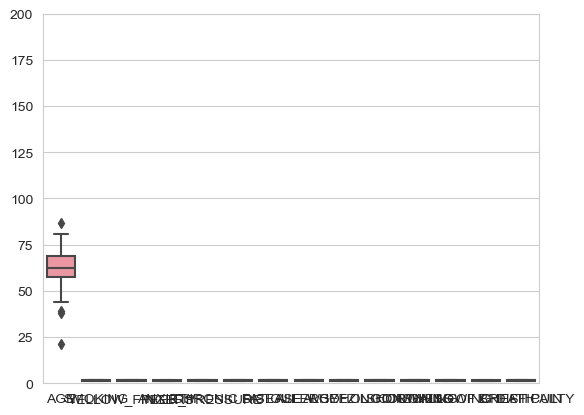

In [9]:
sns.set_style("whitegrid")
gfg = sns.boxplot(data=df)
gfg.set_ylim(0, 200)

(0.0, 200.0)

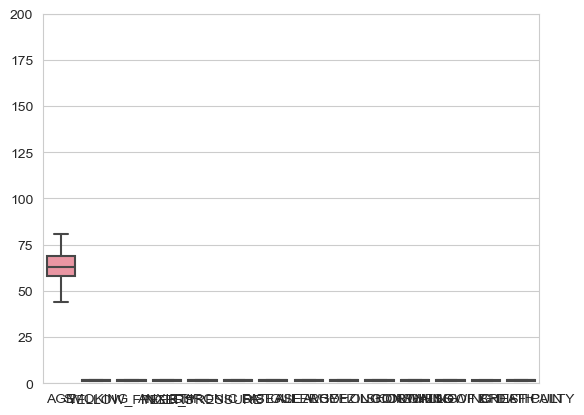

In [10]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.drop(df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)].index, inplace=True)
sns.set_style("whitegrid")
gfg = sns.boxplot(data=df)
gfg.set_ylim(0, 200)

## Encoding

In [11]:
df['GENDER'].replace(['F', 'M'],[0, 1], inplace=True)
df['LUNG_CANCER'].replace(['NO', 'YES'],[0, 1], inplace=True)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>],
       [<Axes: title={'center': 'ANXIETY'}>,
        <Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>],
       [<Axes: title={'center': 'ALLERGY '}>,
        <Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>],
       [<Axes: title={'center': 'SHORTNESS OF BREATH'}>,
        <Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>]], dtype=object)

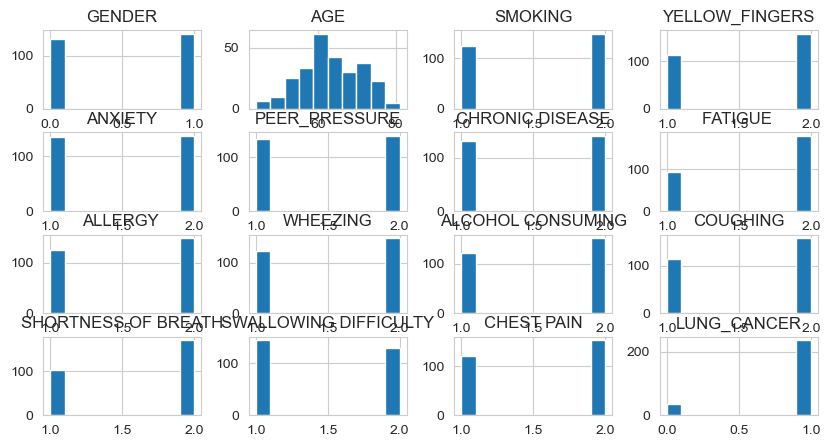

In [12]:
 df.hist(figsize=(10,5))

In [13]:
df.skew()

GENDER                  -0.073988
AGE                      0.032971
SMOKING                 -0.178146
YELLOW_FINGERS          -0.329668
ANXIETY                 -0.014788
PEER_PRESSURE           -0.044373
CHRONIC DISEASE         -0.073988
FATIGUE                 -0.670248
ALLERGY                 -0.178146
WHEEZING                -0.193123
ALCOHOL CONSUMING       -0.223175
COUGHING                -0.329668
SHORTNESS OF BREATH     -0.519266
SWALLOWING DIFFICULTY    0.103650
CHEST PAIN              -0.238255
LUNG_CANCER             -2.181866
dtype: float64

C:\Users\CONNECT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

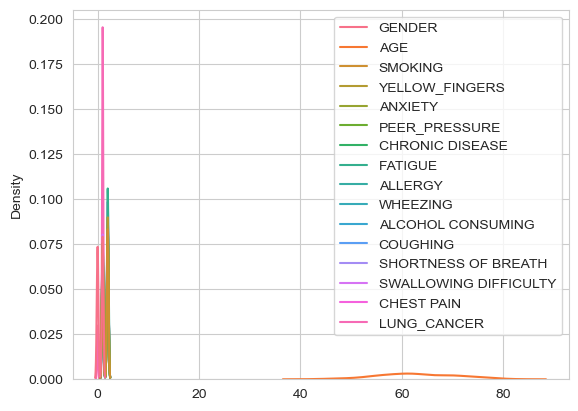

In [14]:
sns.kdeplot(df)

In [15]:
df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.024909,0.033675,-0.207346,-0.162149,-0.280481,-0.178063,-0.074307,0.151862,0.114735,0.425296,0.120723,-0.047495,-0.057045,0.358701,0.036082
AGE,-0.024909,1.000000,-0.053188,0.015272,0.023998,0.032400,0.004086,0.047199,0.094199,0.070826,0.045367,0.174810,0.014714,-0.027002,-0.028664,0.107680
SMOKING,0.033675,-0.053188,1.000000,-0.014520,0.154369,-0.038872,-0.143607,-0.037302,-0.037489,-0.149404,-0.061819,-0.134205,0.053367,0.041523,0.108440,0.034597
YELLOW_FINGERS,-0.207346,0.015272,-0.014520,1.000000,0.557641,0.316857,0.016338,-0.093901,-0.149165,-0.068139,-0.280579,0.003331,-0.103888,0.329270,-0.109458,0.173962
ANXIETY,-0.162149,0.023998,0.154369,0.557641,1.000000,0.205776,-0.000271,-0.172967,-0.155672,-0.177993,-0.163578,-0.232195,-0.146190,0.471605,-0.126749,0.133064
PEER_PRESSURE,-0.280481,0.032400,-0.038872,0.316857,0.205776,1.000000,0.058066,0.101181,-0.068406,-0.046450,-0.150446,-0.070693,-0.210787,0.325175,-0.084082,0.182245
CHRONIC DISEASE,-0.178063,0.004086,-0.143607,0.016338,-0.000271,0.058066,1.000000,-0.105330,0.137089,-0.033100,0.025530,-0.162609,-0.017098,0.075573,-0.041405,0.166359
FATIGUE,-0.074307,0.047199,-0.037302,-0.093901,-0.172967,0.101181,-0.105330,1.000000,-0.006179,0.154865,-0.177350,0.157426,0.402237,-0.106997,0.015150,0.175908
ALLERGY,0.151862,0.094199,-0.037489,-0.149165,-0.155672,-0.068406,0.137089,-0.006179,1.000000,0.162055,0.383803,0.209887,-0.022871,-0.032392,0.242240,0.339560
WHEEZING,0.114735,0.070826,-0.149404,-0.068139,-0.177993,-0.046450,-0.033100,0.154865,0.162055,1.000000,0.256900,0.351041,0.043867,0.108501,0.129954,0.233687


<Axes: >

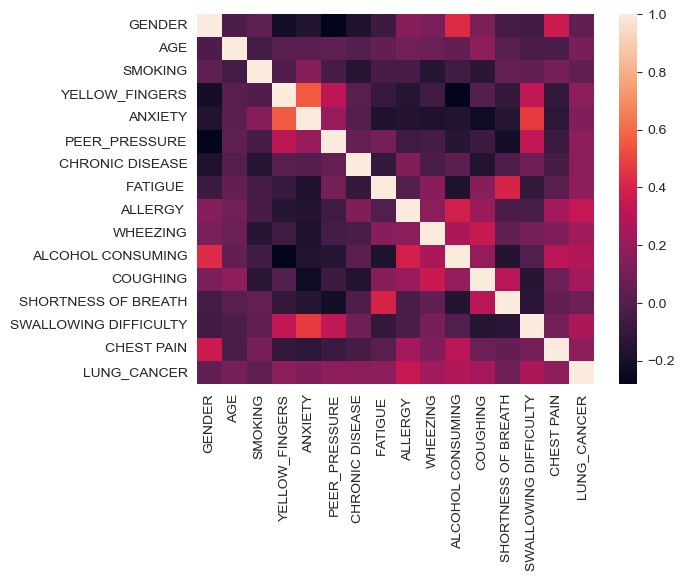

In [16]:
sns.heatmap(df.corr())

In [17]:
covar_matrix = np.cov(df, bias=True)
print(covar_matrix)

[[266.40234375 286.4375     228.1640625  ... 212.2421875  177.0625
  230.859375  ]
 [286.4375     308.5        245.4375     ... 228.5625     190.4375
  248.1875    ]
 [228.1640625  245.4375     195.734375   ... 181.953125   151.625
  197.71875   ]
 ...
 [212.2421875  228.5625     181.953125   ... 169.484375   141.125
  183.90625   ]
 [177.0625     190.4375     151.625      ... 141.125      117.875
  153.4375    ]
 [230.859375   248.1875     197.71875    ... 183.90625    153.4375
  200.0625    ]]


# Binning of age column

In [18]:
max_value = max(df['AGE'])
min_value = min(df['AGE'])
num_bins = 10
bin_width = (max_value - min_value) / num_bins
bins = [min_value + i * bin_width for i in range(num_bins + 1)]

# Z-test

In [19]:
sample_mean = 0
population_mean = 0.135036
population_std = 0.342388
sample_size = 274
alpha = 0.05

# compute the z-score
z_score = (sample_mean-population_mean)/(population_std/np.sqrt(sample_size))
print('Z-Score :',z_score)

# Approach 1: Using Critical Z-Score

# Critical Z-Score
z_critical = stats.norm.ppf(1-alpha)
print('Critical Z-Score :',z_critical)

# Hypothesis
if z_score > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# Approach 2: Using p-value

p_value = 1-stats.norm.cdf(z_score)

print('p-value :',p_value)

# Hypothesis
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Z-Score : -6.528393311860185
Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis
p-value : 0.9999999999667605
Fail to Reject Null Hypothesis


# Data splitting

In [20]:
X = df.drop("LUNG_CANCER",axis=1)
y= df["LUNG_CANCER"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 272
Number of rows in the training set: 217
Number of rows in the test set: 55


# Feature Reduction

## LDA

In [22]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the number of components

# Fit the model and transform the features
X_lda = lda.fit_transform(X, y)

# Display the transformed features
result_df = pd.DataFrame(X_lda, columns=['LDA_Component'])
print(result_df)

     LDA_Component
0        -0.960496
1         0.162642
2         1.540710
3         0.797156
4         2.365739
..             ...
267       0.283066
268       1.035533
269       1.682808
270       2.521784
271      -0.880683

[272 rows x 1 columns]


## PCA

In [23]:
pca = PCA(n_components=1)  # Set the number of components

# Fit and transform the features
X_pca = pca.fit_transform(df)

# Display the transformed features
result_df = pd.DataFrame(X_pca, columns=['PCA_Component'])
print(result_df)

     PCA_Component
0        -5.851002
1       -10.831703
2         4.152513
3         0.176528
4         0.155278
..             ...
267       4.142762
268       4.165884
269       8.169126
270      17.173789
271       3.147820

[272 rows x 1 columns]


# Naive Bayes

In [24]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
predictions[:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
y_pred = classifier.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'Accuracy: {accuracy:.2f}', "%")

Accuracy: 92.73 %


In [26]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))

confusion_matrix: 
 [[ 5  1]
 [ 3 46]]


AttributeError: module 'matplotlib' has no attribute 'show'

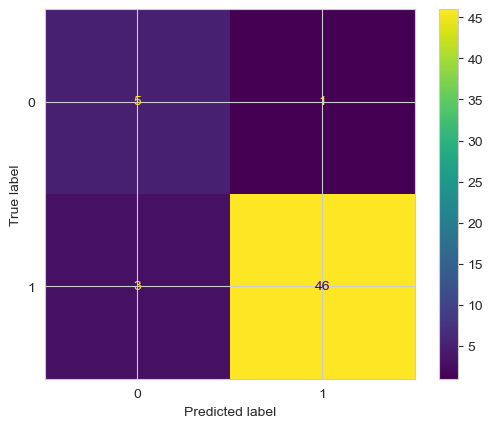

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

# Bayesian Belief Network

In [28]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
model = BayesianModel([
    ('SMOKING', 'YELLOW_FINGERS'),
    ('ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'LUNG_CANCER')
])

# Learn CPDs using Maximum Likelihood Estimators
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Print CPDs (Conditional Probability Distributions)
for cpd in model.get_cpds():
    print(cpd)

# Perform inference using Variable Elimination
inference = VariableElimination(model)
predicted_outcome_prob = inference.query(df=['LUNG_CANCER'], evidence={'SMOKING': 2, 'YELLOW_FINGERS': 2, 'ANXIETY': 2, 'PEER_PRESSURE': 2, 'CHRONIC DISEASE': 2})
print(predicted_outcome_prob)

+------------+----------+
| SMOKING(1) | 0.455882 |
+------------+----------+
| SMOKING(2) | 0.544118 |
+------------+----------+
+-------------------+--------------------+---------------------+
| SMOKING           | SMOKING(1)         | SMOKING(2)          |
+-------------------+--------------------+---------------------+
| YELLOW_FINGERS(1) | 0.4112903225806452 | 0.42567567567567566 |
+-------------------+--------------------+---------------------+
| YELLOW_FINGERS(2) | 0.5887096774193549 | 0.5743243243243243  |
+-------------------+--------------------+---------------------+
+------------+----------+
| ANXIETY(1) | 0.496324 |
+------------+----------+
| ANXIETY(2) | 0.503676 |
+------------+----------+
+------------------+--------------------+---------------------+
| ANXIETY          | ANXIETY(1)         | ANXIETY(2)          |
+------------------+--------------------+---------------------+
| PEER_PRESSURE(1) | 0.5925925925925926 | 0.38686131386861317 |
+------------------+---------

TypeError: VariableElimination.query() got an unexpected keyword argument 'df'

In [29]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))

confusion_matrix: 
 [[ 5  1]
 [ 3 46]]


AttributeError: module 'matplotlib' has no attribute 'show'

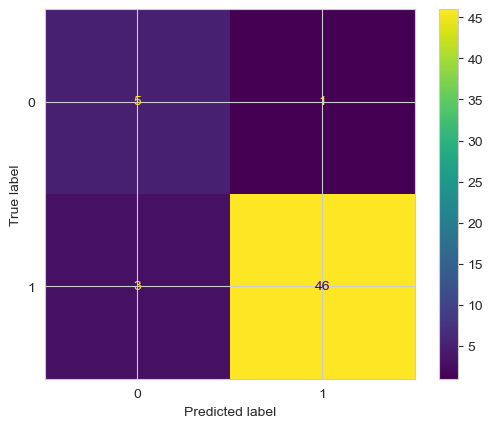

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

# Decision Tree

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
print('Accuracy:', accuracy*100, "%")

Accuracy: 89.0909090909091 %


# confusion matrix

In [32]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))

confusion_matrix: 
 [[ 3  3]
 [ 3 46]]


AttributeError: module 'matplotlib' has no attribute 'show'

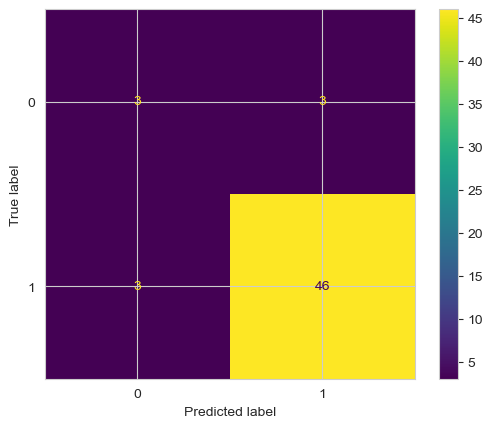

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [34]:
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Precision score:  0.9387755102040817
Recall score:  0.9387755102040817
F1 score:  0.9387755102040817


In [35]:
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions,)))

Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.94      0.94      0.94        49

    accuracy                           0.89        55
   macro avg       0.72      0.72      0.72        55
weighted avg       0.89      0.89      0.89        55



In [36]:
covar_matrix = np.cov(df, bias=True)
print(covar_matrix)

[[266.40234375 286.4375     228.1640625  ... 212.2421875  177.0625
  230.859375  ]
 [286.4375     308.5        245.4375     ... 228.5625     190.4375
  248.1875    ]
 [228.1640625  245.4375     195.734375   ... 181.953125   151.625
  197.71875   ]
 ...
 [212.2421875  228.5625     181.953125   ... 169.484375   141.125
  183.90625   ]
 [177.0625     190.4375     151.625      ... 141.125      117.875
  153.4375    ]
 [230.859375   248.1875     197.71875    ... 183.90625    153.4375
  200.0625    ]]


# LDA model

In [37]:
lda_m= LDA()
lda = lda_m.fit(X_train,y_train)
lda_predictions=lda.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, lda_predictions),'%'))

Accuracy score:  92.727273%


In [38]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))

confusion_matrix: 
 [[ 3  3]
 [ 3 46]]


AttributeError: module 'matplotlib' has no attribute 'show'

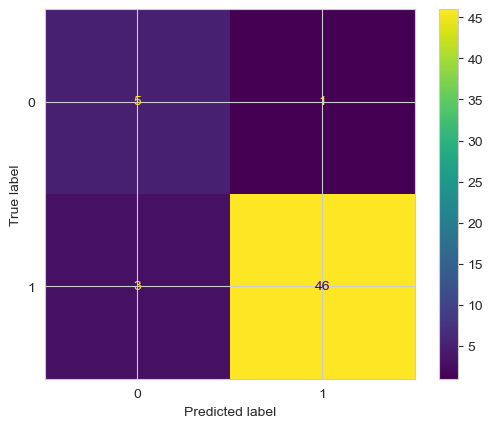

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

# PCA model

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the number of components (adjust as needed)
n_components = 5

# Create a PCA model
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)

# You can now use X_train_pca and X_test_pca as your new feature matrices

# (Optional) If you want to use these components for classification, you can use any classifier
# Example using a simple classifier (replace with your preferred classifier)
from sklearn.linear_model import LogisticRegression

# Create a classifier
classifier = LogisticRegression()

# Fit the classifier on the PCA-transformed training data
classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
predictions = classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Display results
print('Accuracy:', accuracy)

Accuracy: 0.9090909090909091


In [41]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))

confusion_matrix: 
 [[ 4  2]
 [ 3 46]]


AttributeError: module 'matplotlib' has no attribute 'show'

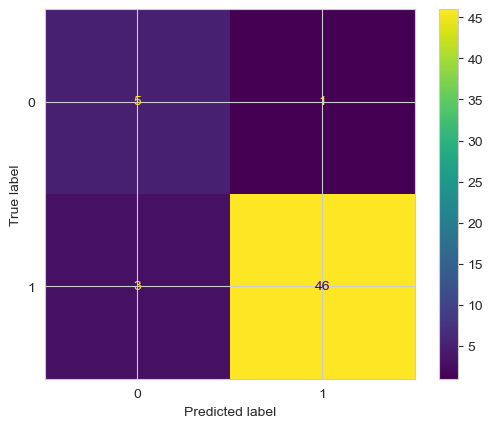

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

# K-folds

In [43]:
model = RandomForestClassifier()
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
average_accuracy = np.mean(accuracy_scores)
print(f'Accuracy Scores: {accuracy_scores}')
print(f'Average Accuracy: {average_accuracy}')

Accuracy Scores: [0.85454545 0.98181818 0.85185185 0.88888889 0.90740741]
Average Accuracy: 0.896902356902357


In [44]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))

confusion_matrix: 
 [[ 4  2]
 [ 3 46]]


AttributeError: module 'matplotlib' has no attribute 'show'

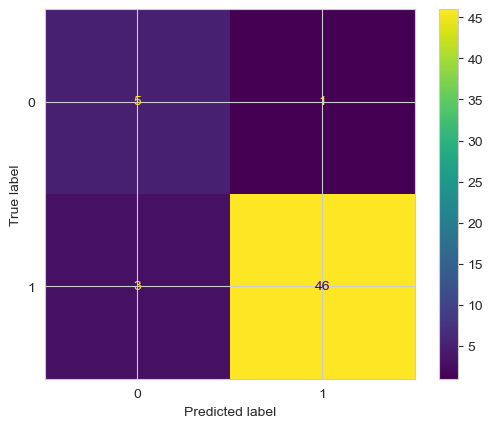

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

# KNN using different distances

In [46]:
# Euclidean distance
knn_m_euclidean = KNeighborsClassifier(n_neighbors=97)
knn_m_euclidean.fit(X_train, y_train)
knn_predictions_euclidean = knn_m_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, knn_predictions_euclidean)
print('Accuracy score (Euclidean): {:.2%}'.format(accuracy_euclidean))

# Manhattan distance
knn_m_manhattan = KNeighborsClassifier(n_neighbors=97, metric='manhattan')
knn_m_manhattan.fit(X_train, y_train)
knn_predictions_manhattan = knn_m_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, knn_predictions_manhattan)
print('Accuracy score (Manhattan): {:.2%}'.format(accuracy_manhattan))

# Minkowski distance (generalization of Euclidean and Manhattan)
knn_m_minkowski = KNeighborsClassifier(n_neighbors=97, metric='minkowski', p=3)  # p=2 for Euclidean, p=1 for Manhattan
knn_m_minkowski.fit(X_train, y_train)
knn_predictions_minkowski = knn_m_minkowski.predict(X_test)
accuracy_minkowski = accuracy_score(y_test, knn_predictions_minkowski)
print('Accuracy score (Minkowski): {:.2%}'.format(accuracy_minkowski))

Accuracy score (Euclidean): 89.09%
Accuracy score (Manhattan): 89.09%
Accuracy score (Minkowski): 89.09%


In [47]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))

confusion_matrix: 
 [[ 4  2]
 [ 3 46]]


AttributeError: module 'matplotlib' has no attribute 'show'

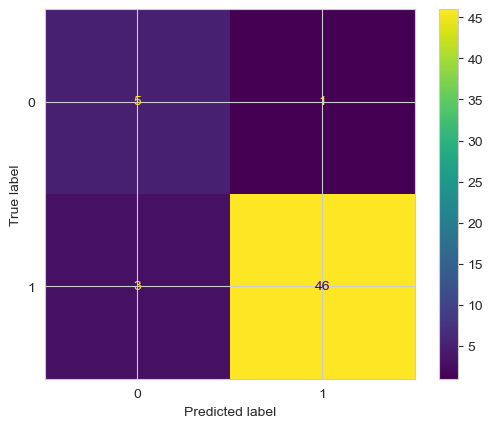

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

In [49]:
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions,)))

Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.96      0.94      0.95        49

    accuracy                           0.91        55
   macro avg       0.76      0.80      0.78        55
weighted avg       0.92      0.91      0.91        55



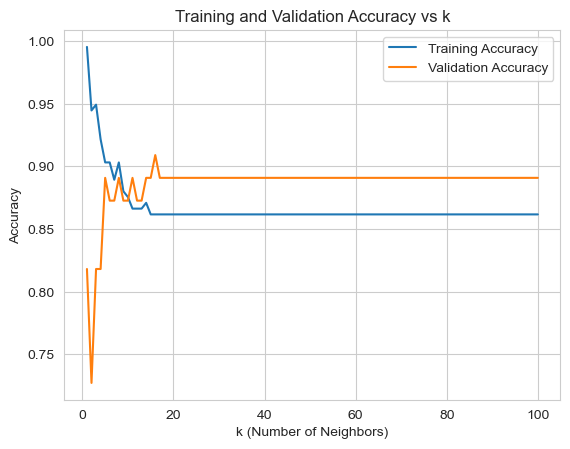

The model is fitting well.


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are defined

# Define a range of k values to experiment with
k_values = range(1, 101)

# Lists to store accuracy for training and validation sets
train_accuracy_values = []
val_accuracy_values = []

# Loop through different k values
for k in k_values:
    # Create and fit the KNeighborsClassifier with the current k value
    knn_m = KNeighborsClassifier(n_neighbors=k)
    knn_m.fit(X_train, y_train)

    # Predictions on the training set
    train_predictions = knn_m.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracy_values.append(train_accuracy)

    # Predictions on the validation set
    val_predictions = knn_m.predict(X_test)
    val_accuracy = accuracy_score(y_test, val_predictions)
    val_accuracy_values.append(val_accuracy)

# Plotting the training and validation accuracy
plt.plot(k_values, train_accuracy_values, label='Training Accuracy')
plt.plot(k_values, val_accuracy_values, label='Validation Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs k')
plt.legend()
plt.show()

# Check for overfitting, underfitting, or fitting well
if max(val_accuracy_values) <= max(train_accuracy_values):
    print("The model is fitting well.")
elif max(val_accuracy_values) < max(train_accuracy_values):
    print("The model may be overfitting.")
else:
    print("The model may be underfitting.")